In [ ]:
# pip install networkx

import networkx as nx

# Step 1: Create a directed graph
G = nx.DiGraph()

# Step 2: Add nodes and edges (example with distances as weights)
# Format: G.add_edge('Start', 'End', weight=distance)

G.add_edge('Depot', 'Area1', weight=5)
G.add_edge('Depot', 'Area2', weight=10)
G.add_edge('Area1', 'Area3', weight=3)
G.add_edge('Area2', 'Area3', weight=1)
G.add_edge('Area3', 'Area4', weight=2)
G.add_edge('Area2', 'Area4', weight=6)

# Step 3: Use Dijkstra's Algorithm to find shortest path
source = 'Depot'
target = 'Area4'

shortest_path = nx.dijkstra_path(G, source, target)
path_length = nx.dijkstra_path_length(G, source, target)

# Step 4: Output result
print("Shortest path from", source, "to", target, ":", shortest_path)
print("Total distance:", path_length)

Shortest path from Depot to Area4 : ['Depot', 'Area1', 'Area3', 'Area4']
Total distance: 10


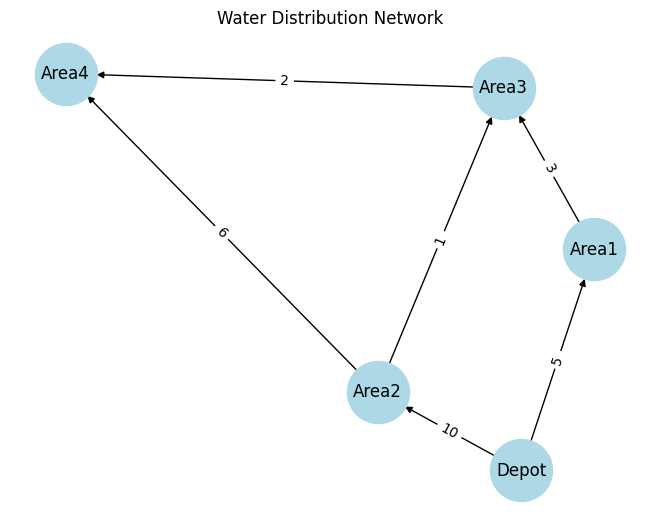

In [ ]:
import matplotlib.pyplot as plt

pos = nx.spring_layout(G)  # Positions for all nodes

nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Water Distribution Network")
plt.show()

**Basic Dijkstra’s Algorithm in Python (No external libraries)**

Let’s say we have 5 places connected by roads with distances:

Depot --5--> Area1

Depot --10--> Area2

Area1 --3--> Area3

Area2 --1--> Area3

Area3 --2--> Area4

Area2 --6--> Area4

In [ ]:
# Step 1: Define the graph
graph = {
    'Depot': {'Area1': 5, 'Area2': 10},
    'Area1': {'Area3': 3},
    'Area2': {'Area3': 1, 'Area4': 6},
    'Area3': {'Area4': 2},
    'Area4': {}
}

# Step 2: Dijkstra’s algorithm function
def dijkstra(graph, start):
    shortest_distances = {node: float('inf') for node in graph}
    shortest_distances[start] = 0
    visited = set()
    previous_nodes = {}

    while len(visited) < len(graph):
        # Find the unvisited node with the smallest distance
        current_node = None
        for node in graph:
            if node not in visited:
                if current_node is None or shortest_distances[node] < shortest_distances[current_node]:
                    current_node = node

        if shortest_distances[current_node] == float('inf'):
            break

        # Update distances to neighbors
        for neighbor, weight in graph[current_node].items():
            new_distance = shortest_distances[current_node] + weight
            if new_distance < shortest_distances[neighbor]:
                shortest_distances[neighbor] = new_distance
                previous_nodes[neighbor] = current_node

        visited.add(current_node)

    return shortest_distances, previous_nodes

# Step 3: Get the shortest path to a target
def get_shortest_path(previous_nodes, start, end):
    path = []
    current = end
    while current != start:
        path.append(current)
        current = previous_nodes.get(current)
        if current is None:
            return None  # No path
    path.append(start)
    path.reverse()
    return path

# Step 4: Run the algorithm
start_point = 'Depot'
end_point = 'Area4'
distances, previous = dijkstra(graph, start_point)
path = get_shortest_path(previous, start_point, end_point)

# Step 5: Display results
print("Shortest distance from", start_point, "to", end_point, "is", distances[end_point])
print("Path:", " -> ".join(path))

Shortest distance from Depot to Area4 is 10
Path: Depot -> Area1 -> Area3 -> Area4


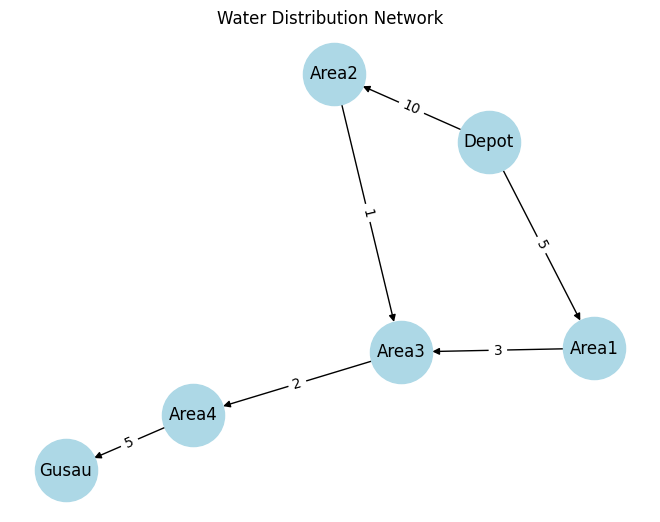

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Create a directed graph
G = nx.DiGraph()

# Step 2: Add nodes and edges (example with distances as weights)
# Format: G.add_edge('Start', 'End', weight=distance)

G.add_edge('Depot', 'Area1', weight=5)
G.add_edge('Depot', 'Area2', weight=10)
G.add_edge('Area1', 'Area3', weight=3)
G.add_edge('Area2', 'Area3', weight=1)
G.add_edge('Area3', 'Area4', weight=2)
G.add_edge('Area4', 'Gusau', weight=5)

pos = nx.spring_layout(G)  # Positions for all nodes

nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Water Distribution Network")
plt.show()